<a href="https://colab.research.google.com/github/piyushmalu23/CO2-Emission-by-Vehicles/blob/main/CO2-emission-by-vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exploratory Data Analysis***

In [32]:
import numpy as np 
import pandas as pd
      
import seaborn as sns 
import matplotlib.pyplot as plt


import warnings

In [33]:
warnings.filterwarnings("ignore")


In [34]:
df=pd.read_csv('./CO2 Emissions_Canada.csv')

In [35]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [37]:
df.shape

(7385, 12)

In [38]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [39]:
df.duplicated().sum()

1103

In [40]:
# Drop Duplicated data
df= df.drop_duplicates()
df.shape

(6282, 12)

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [42]:
def explore_cat_feature(feature):
    group= df.groupby(feature).mean()
    plt.figure(figsize=[15,5])
    plots = group['CO2 Emissions(g/km)'].sort_values().plot(kind = 'bar', fontsize=15)
    plt.xlabel(feature, fontsize=15);
    plt.ylabel('Mean Co2 Emission', fontsize=15);
    plt.title("Mean Co2 Emission according to {} feature\n".format(feature), fontsize=20)

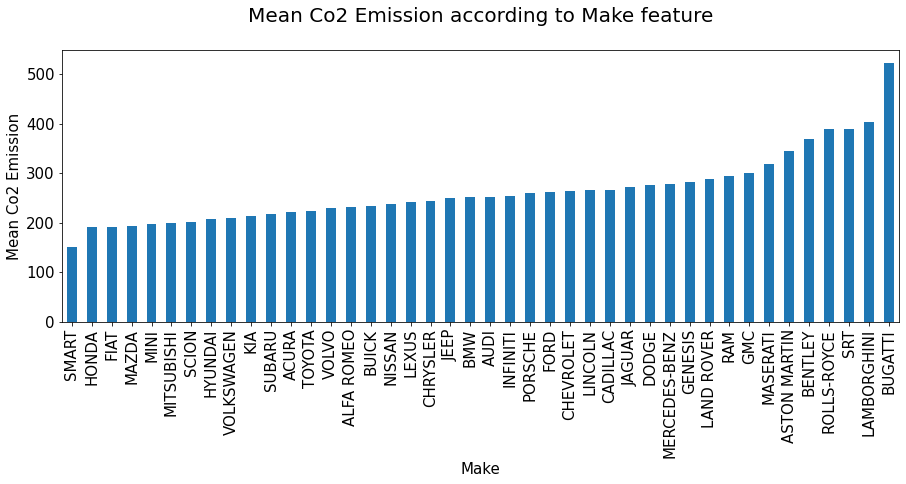

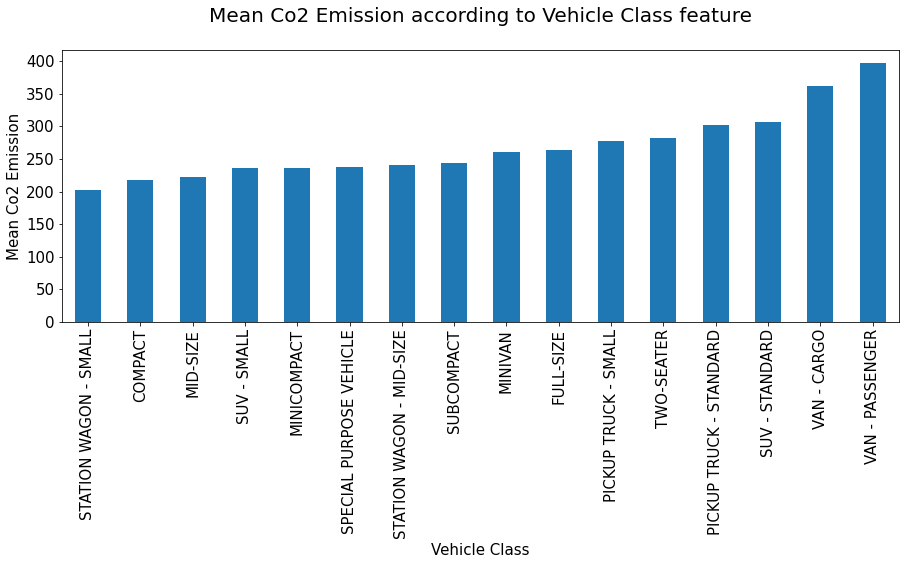

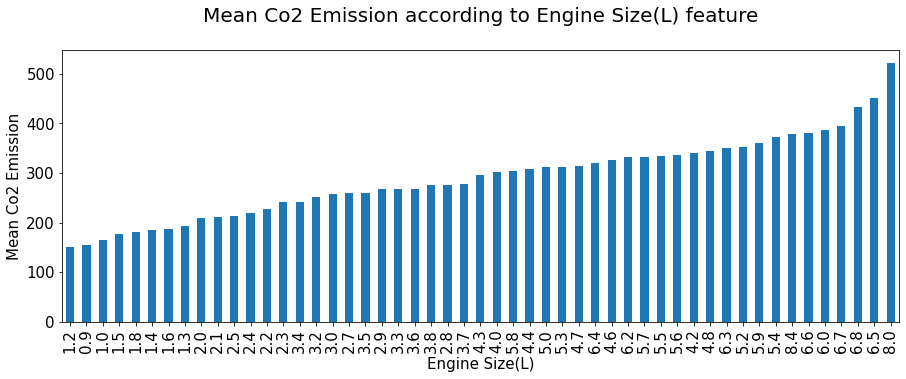

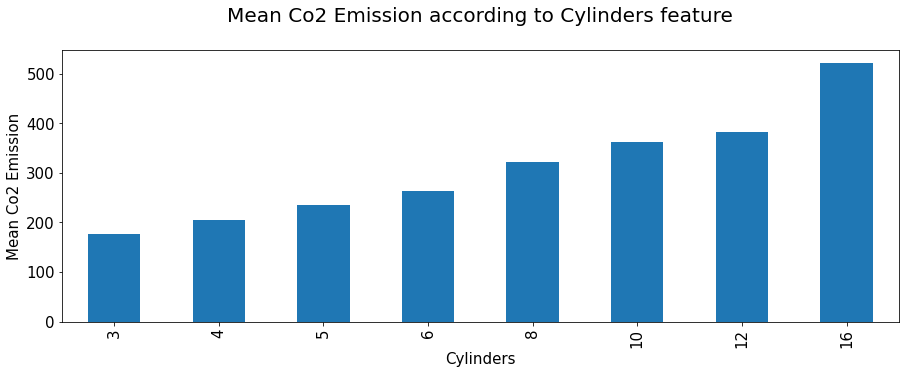

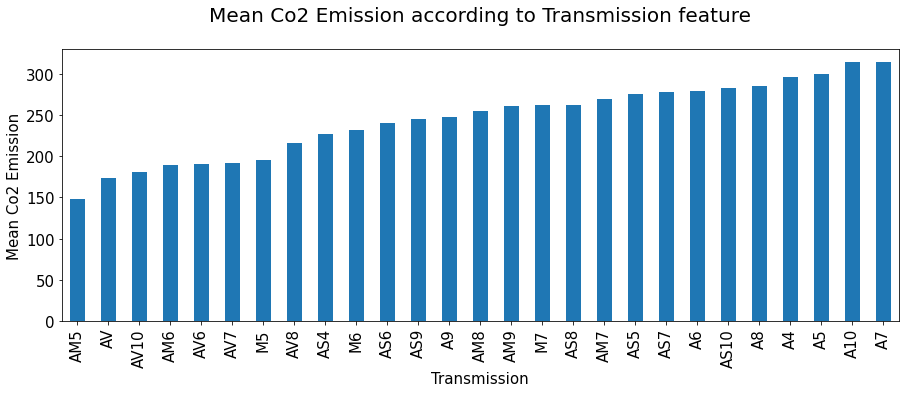

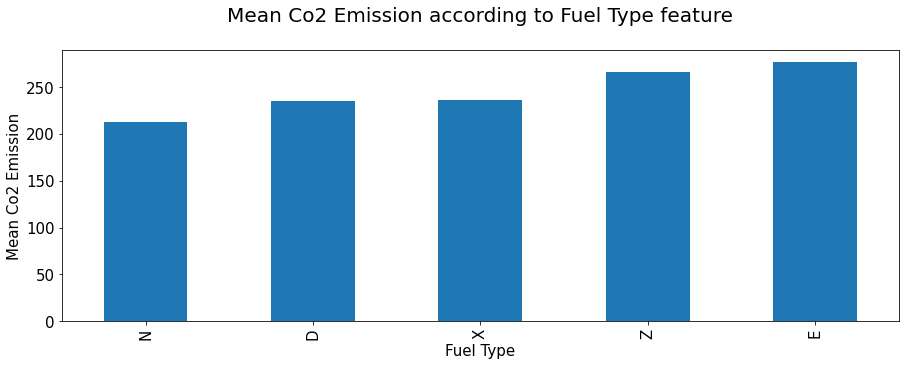

In [43]:
for feature in ['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']:
    explore_cat_feature(feature)

In [44]:
df["Model"].value_counts()

F-150 FFV                           32
F-150 FFV 4X4                       31
MUSTANG                             27
FOCUS FFV                           24
F-150 4X4                           20
                                    ..
AMG C 43 4MATIC Coupe                1
AMG GT 53 4MATIC+ Coupe              1
CLS 450 4MATIC                       1
CONTINENTAL GT SPEED CONVERTIBLE     1
X2 xDRIVE28i                         1
Name: Model, Length: 2053, dtype: int64

In [45]:
def explore_num_feature(feature):
    plt.figure(figsize=[15,5])
    plt.scatter(df[feature], df['CO2 Emissions(g/km)'])
    plt.xlabel(feature, fontsize=15);
    plt.ylabel('Co2 Emission', fontsize=15);
    plt.title(" Co2 Emission vs. {} \n".format(feature), fontsize=20)

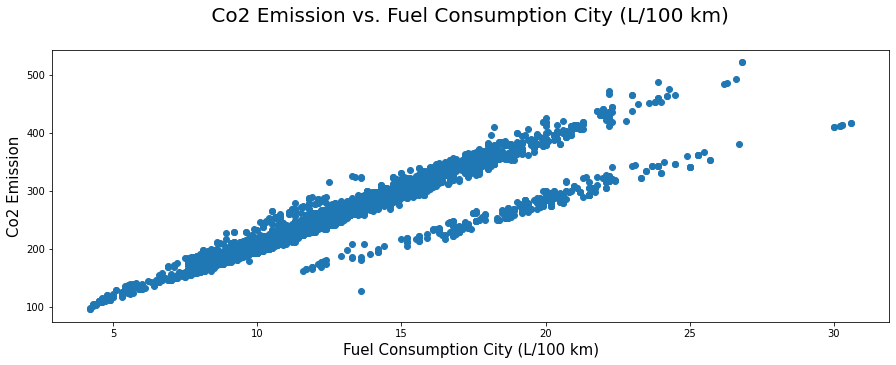

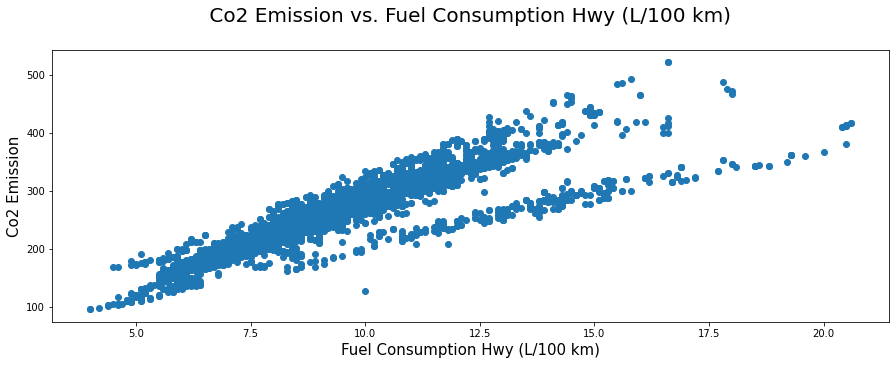

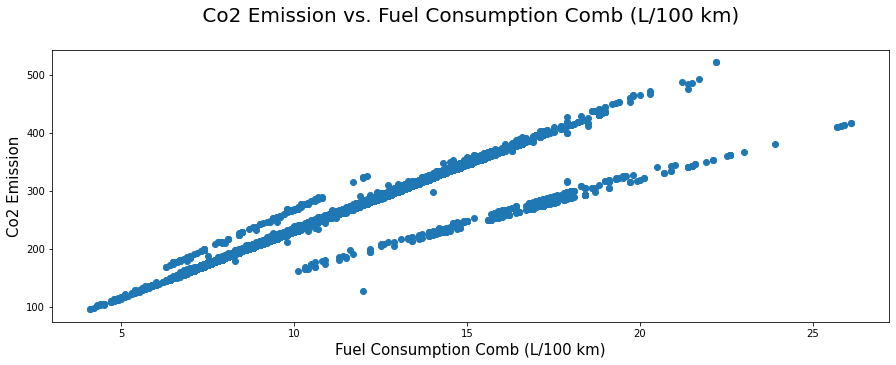

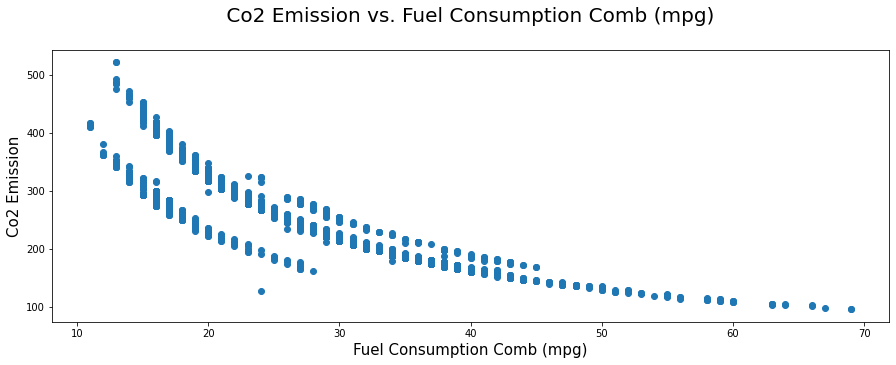

In [46]:
for feature in ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']:
    explore_num_feature(feature)

In [47]:
df.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
Cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
Fuel Consumption City (L/100 km),0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


# ***Build A Simple Model***

In [48]:
df2 = df.drop(['Make','Model','Vehicle Class','Fuel Consumption City (L/100 km)', 'Transmission', 'Fuel Type', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (mpg)'],axis=1)
df2.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [49]:
X = df2.drop(['CO2 Emissions(g/km)'], axis= 1)
y = df2["CO2 Emissions(g/km)"]

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ***Linear Regression***

In [51]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print('Training Accuracy: ', lin_reg.score(X_train, y_train))
print('Testing Accuracy: ', lin_reg.score(X_test, y_test))

Training Accuracy:  0.8786148666395369
Testing Accuracy:  0.8786783058892105


In [53]:
cross_val_score(lin_reg, X, y, cv = 10, scoring = "r2").mean()

0.8747900445287506

# ***Try Ridge<!--  -->***

In [54]:
from sklearn.linear_model import RidgeCV, Ridge
ridge_cv = RidgeCV(alphas = 10**np.linspace(10,-2,100), scoring = "neg_mean_squared_error", normalize = True)
ridge_cv.fit(X_train, y_train)
print('Alpha= ', ridge_cv.alpha_)
ridge_tuned = Ridge(alpha = ridge_cv.alpha_,  normalize = True).fit(X_train,y_train)
print('Training Accuracy: ', ridge_tuned.score(X_train, y_train))
print('Testing Accuracy: ', ridge_tuned.score(X_test, y_test))

Alpha=  0.01
Training Accuracy:  0.8785325179999944
Testing Accuracy:  0.8786342942824651


In [55]:
df3= pd.get_dummies(df, drop_first=True)
df3.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,Make_BMW,Make_BUGATTI,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FIAT,Make_FORD,Make_GENESIS,Make_GMC,Make_HONDA,Make_HYUNDAI,Make_INFINITI,Make_JAGUAR,Make_JEEP,Make_KIA,Make_LAMBORGHINI,Make_LAND ROVER,Make_LEXUS,Make_LINCOLN,Make_MASERATI,Make_MAZDA,Make_MERCEDES-BENZ,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_PORSCHE,Make_RAM,...,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# ***Linear Regression***

In [56]:
X = df3.drop(['CO2 Emissions(g/km)'], axis= 1)
y = df3["CO2 Emissions(g/km)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('Training Accuracy: ', lin_reg.score(X_train, y_train))
print('Testing Accuracy: ', lin_reg.score(X_test, y_test))

Training Accuracy:  0.9974227776056205
Testing Accuracy:  -1.936667444765863e+18


## ***Ridge***

In [57]:
ridge= Ridge(alpha =0.001,  normalize = True).fit(X_train,y_train)
print('Training Accuracy: ', ridge.score(X_train, y_train))
print('Testing Accuracy: ', ridge.score(X_test, y_test))

Training Accuracy:  0.9973774873008588
Testing Accuracy:  0.988630281535317


# ***Lasso***

In [58]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01).fit(X_train, y_train)
print('Training Accuracy: ', lasso.score(X_train, y_train))
print('Testing Accuracy: ', lasso.score(X_test, y_test))

Training Accuracy:  0.9938904541381282
Testing Accuracy:  0.9901712580259968


# ***Random Forest***

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)
print('Training Accuracy: ', rf.score(X_train, y_train))
print('Testing Accuracy: ', rf.score(X_test, y_test))

Training Accuracy:  0.9992120852477875
Testing Accuracy:  0.994010887881301


In [60]:
from sklearn.model_selection import cross_val_score
print('Lasso Cross Validation: ' , cross_val_score(lasso, X, y, cv=5))
print('RandomForest Cross Validation: ' , cross_val_score(rf, X, y, cv=5))

Lasso Cross Validation:  [0.98405578 0.98702376 0.99312456 0.99518396 0.99592026]
RandomForest Cross Validation:  [0.99092548 0.9927864  0.99412852 0.99462453 0.99484795]
